# First tutoring 01/04/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sm
from scipy import integrate
import scipy.special as sp

Variable definition

In [105]:
variable = 6.5
type (variable)

%whos float  #gives indications over what variable is of a certain type

Variable       Type     Data/Info
---------------------------------
BE             float    1.9474400000000003
BE_nuc         float    7.558501500000001
amu            float    240.052
compound_amu   float    241.06065999999998
conv_factor    float    931.5
m_n            float    1.00866
m_p            float    1.00782
variable       float    6.5


Lists: in python, the first index of a list is 0 and not 1

In [106]:
list_variable = [1,2,3,4,5]
type(list_variable)
list_variable[-1]   #the -1 index gives the last element of the list
len (list_variable) #gives the length of the list


5

In [107]:
list_variable[0:]  # shows the while list
list_variable[0:2] # shows the first two elements of the list
list_variable[0::2] # shows the first element and then every second element

[1, 3, 5]

## List of nuclides and their barrier energies

In [108]:
nuclides = ['232-Th', '233-Th', '233-U', '234-U', '235-U', '236-U', '238-U', '239-U', '239-Pu', '240-Pu']
type(nuclides)
barrier_energy = [5.9, 6.5, 5.5, 4.6, 5.75, 5.3, 5.85, 5.5, 5.5, 4.6]


In [109]:
dictionary = {
    '232-Th':[5.9,232.038, 90],    #The dictionary is a key-value pair that associates a key (Th-232) with a value (5.9)
    '233-Th':[6.5,233.041, 90],   #The value can be anything: a value, a list, a function etc.
    '233-U':[5.5, 233.040, 92],   #In this case, the dictionary is a list of lists and not a matrix.
    '234-U':[4.6, 234.041, 92],   #We have that the key is the name of the nuclide, the value is a list with the barrier energy, the atomic mass and the atomic number.
    '235-U':[5.75, 235.042, 92],
    '236-U':[5.3, 236.043, 92],
    '238-U':[5.85, 238.050, 92],
    '239-U':[5.5, 239.051, 92],
    '239-Pu':[5.5, 239.051, 94],
    '240-Pu':[4.6, 240.052, 94]
}
dictionary.items()  #shows the key-value pair
dictionary.keys()   #shows the keys
dictionary.values() #shows the values
list(dictionary.keys()) #transforms the keys into a list
list(dictionary.values()) #transforms the values into a list

[[5.9, 232.038, 90],
 [6.5, 233.041, 90],
 [5.5, 233.04, 92],
 [4.6, 234.041, 92],
 [5.75, 235.042, 92],
 [5.3, 236.043, 92],
 [5.85, 238.05, 92],
 [5.5, 239.051, 92],
 [5.5, 239.051, 94],
 [4.6, 240.052, 94]]

The list() command converts any variable into a string. There are other commands to transform variable types into
int, float, etc.

In [110]:
values = list(dictionary.values())
len(values)
list1=values[0]
len(list1)

3

In [111]:
dictionary1  = {
    '232-Th':{                    #232-th is the main key, all the other keys are subkeys
        'barrier_value':5.9,      #The dictionary can also be a dictionary of dictionaries.
        'atomic_mass':232.08,
        'Z':90
    }
}

dictionary1.keys()
dictionary1['232-Th']                   #this command extracts the dictionary associated with the key '232-Th'
dictionary1['232-Th']['barrier_value']  #this command extracts the value associated with the key 'barrier_value' in the dictionary associated with the key '232-Th'


5.9

We now see how to build a dictionary using "for" cycles

In [112]:
values = list(dictionary.values())

barrier_values = list()
amu_values =[]            # these are three lists containing nothing. The commands below will append values to them
z_values = []             # the syntax of the three commands is equivalent


values[0][0]    #this extracts the first value of the first dictionary in the list

#barrier_values.append(values[0][0])  #this appends the first value of the first dictionary (barrier energy value) in the list to the list barrier_values
#amu_values.append(values[0][1])       #this appends the second value of the first dictionary (amu values) in the list to the list amu_values
#z_values.append(values[0][2])         #this appends the third value of the first dictionary (atomic number) in the list to the list z_values

#the append command adds an element to the end of the list and does not modify the other elements of the list


for i in range(0, len(values)):  #this loop will iterate over all the dictionaries in the list values
    barrier_values.append(values[i][0])  #this will append the barrier energy value of the i-th dictionary to the list barrier_values
    amu_values.append(values[i][1])       #this will append the amu value of the i-th dictionary to the list amu_values
    z_values.append(values[i][2])         #this will append the atomic number of the i-th dictionary to the list z_values

print(barrier_values)
print(amu_values)
print(z_values)

[5.9, 6.5, 5.5, 4.6, 5.75, 5.3, 5.85, 5.5, 5.5, 4.6]
[232.038, 233.041, 233.04, 234.041, 235.042, 236.043, 238.05, 239.051, 239.051, 240.052]
[90, 90, 92, 92, 92, 92, 92, 92, 94, 94]


We create a new dictionary and fill it with the lists we just created

In [113]:
data = {}

for i in range(len(nuclides)):
    data[nuclides[i]] = {
        'barrier_value': barrier_values[i],
        'atomic_mass': amu_values[i],
        'Z': z_values[i]
    }

data

{'232-Th': {'barrier_value': 5.9, 'atomic_mass': 232.038, 'Z': 90},
 '233-Th': {'barrier_value': 6.5, 'atomic_mass': 233.041, 'Z': 90},
 '233-U': {'barrier_value': 5.5, 'atomic_mass': 233.04, 'Z': 92},
 '234-U': {'barrier_value': 4.6, 'atomic_mass': 234.041, 'Z': 92},
 '235-U': {'barrier_value': 5.75, 'atomic_mass': 235.042, 'Z': 92},
 '236-U': {'barrier_value': 5.3, 'atomic_mass': 236.043, 'Z': 92},
 '238-U': {'barrier_value': 5.85, 'atomic_mass': 238.05, 'Z': 92},
 '239-U': {'barrier_value': 5.5, 'atomic_mass': 239.051, 'Z': 92},
 '239-Pu': {'barrier_value': 5.5, 'atomic_mass': 239.051, 'Z': 94},
 '240-Pu': {'barrier_value': 4.6, 'atomic_mass': 240.052, 'Z': 94}}

### Now we want to compute the binding energy per nucleon for each nuclide

$B_e = c^2[Z\cdot m_p + N\cdot m_n - amu]$
$\\ B_e(MeV/nucleon) = B_e\cdot \frac{MeV}{A}$

$\\ amu_{compound} = amu + m_n$
$\\ LNB_e = amu-amu_{compound} = last\, neutron\, binding\, energy$

In [114]:
m_n = 1.00866
m_p = 1.00782
conv_factor = 931.5   #the number needed to go from kg*km^2/s^2 to MeV

#We will now cycle over all nuclides
for i in range (0,len(nuclides)):

    amu = data[nuclides[i]]['atomic_mass']
    Z = data[nuclides[i]]['Z']
    a = round(amu)
    n = a - Z      #number of neutrons

    BE = n * m_n + Z * m_p - amu
    BE_nuc = BE * (conv_factor / a)
    compound_amu = amu + m_n

    data[nuclides[i]]['BE'] = BE
    data[nuclides[i]]['BE_nuc'] = BE_nuc
    data[nuclides[i]]['compound_amu'] = compound_amu

data


{'232-Th': {'barrier_value': 5.9,
  'atomic_mass': 232.038,
  'Z': 90,
  'BE': 1.8955199999999763,
  'BE_nuc': 7.610676206896456,
  'compound_amu': 233.04666},
 '233-Th': {'barrier_value': 6.5,
  'atomic_mass': 233.041,
  'Z': 90,
  'BE': 1.9011799999999823,
  'BE_nuc': 7.600640214592204,
  'compound_amu': 234.04966},
 '233-U': {'barrier_value': 5.5,
  'atomic_mass': 233.04,
  'Z': 92,
  'BE': 1.9004999999999939,
  'BE_nuc': 7.597921673819718,
  'compound_amu': 234.04865999999998},
 '234-U': {'barrier_value': 4.6,
  'atomic_mass': 234.041,
  'Z': 92,
  'BE': 1.908159999999981,
  'BE_nuc': 7.59594461538454,
  'compound_amu': 235.04966},
 '235-U': {'barrier_value': 5.75,
  'atomic_mass': 235.042,
  'Z': 92,
  'BE': 1.915819999999968,
  'BE_nuc': 7.593984382978597,
  'compound_amu': 236.05066},
 '236-U': {'barrier_value': 5.3,
  'atomic_mass': 236.043,
  'Z': 92,
  'BE': 1.9234799999999552,
  'BE_nuc': 7.5920407627116875,
  'compound_amu': 237.05166},
 '238-U': {'barrier_value': 5.85,
  '

In [115]:
data['232-Th']['LNBE'] = conv_factor*(data['232-Th']['compound_amu']-data['233-Th']['atomic_mass'])
data['232-Th']['LNBE']

5.272290000005583

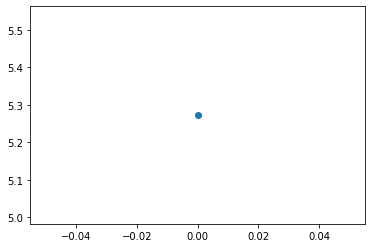

In [116]:
plt.scatter(0,data['232-Th']['LNBE'])

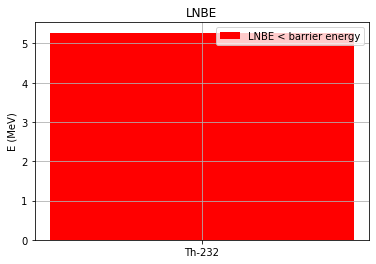

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
if data['232-Th']['LNBE'] > data['232-Th']['barrier_value']:
    barcolor = 'green'
    statement = 'LNBE > barrier energy'
else:
    barcolor = 'red'
    statement = 'LNBE < barrier energy'


plt.bar('Th-232',data['232-Th']['LNBE'], color=barcolor)
plt.title('LNBE')
plt.ylabel('E (MeV)')
plt.grid()
plt.legend([statement])
plt.show()

We now use the numpy library

In [137]:
arr = np.array([0,1,2,3,4])
arr.shape  #gives the shape of the array
arr.size   #gives the number of elements in the array

arr = np.array([       #this gives a 2d matrix which is not a list of lists but a mathematicl element
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

arr = np.zeros(5)  #this gives a 1d array of zeros (a vector of zeros) with 5 elements
arr = np.ones((5,5)) #this gives a 2d array of ones with 5 rows and 5 columns

energy = np.arange(0,15,0.001)  #this gives an array of numbers from 0 to 15 with a step of 0.0001
energy.shape
energy = np.linspace(0,15,1000)  #this gives an array of 1000 numbers divided equally from 0 to 15
#arange and linspace give the same result with a different syntax


In [138]:
energy* 10**-6  #this multiplies all the elements of the array by 10^-6 (eV to MeV). We cannot do this with lists


array([0.00000000e+00, 1.50150150e-08, 3.00300300e-08, 4.50450450e-08,
       6.00600601e-08, 7.50750751e-08, 9.00900901e-08, 1.05105105e-07,
       1.20120120e-07, 1.35135135e-07, 1.50150150e-07, 1.65165165e-07,
       1.80180180e-07, 1.95195195e-07, 2.10210210e-07, 2.25225225e-07,
       2.40240240e-07, 2.55255255e-07, 2.70270270e-07, 2.85285285e-07,
       3.00300300e-07, 3.15315315e-07, 3.30330330e-07, 3.45345345e-07,
       3.60360360e-07, 3.75375375e-07, 3.90390390e-07, 4.05405405e-07,
       4.20420420e-07, 4.35435435e-07, 4.50450450e-07, 4.65465465e-07,
       4.80480480e-07, 4.95495495e-07, 5.10510511e-07, 5.25525526e-07,
       5.40540541e-07, 5.55555556e-07, 5.70570571e-07, 5.85585586e-07,
       6.00600601e-07, 6.15615616e-07, 6.30630631e-07, 6.45645646e-07,
       6.60660661e-07, 6.75675676e-07, 6.90690691e-07, 7.05705706e-07,
       7.20720721e-07, 7.35735736e-07, 7.50750751e-07, 7.65765766e-07,
       7.80780781e-07, 7.95795796e-07, 8.10810811e-07, 8.25825826e-07,
      

We introduce the watt spectrum, which is the energy spectrum of fission neutrons:
$Ce^{-\frac{E}{a}}sinh(\sqrt{bE})$

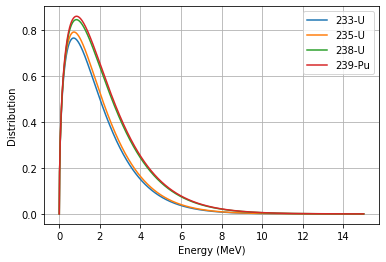

In [ ]:
C = 1
a= [0.96, 0.965, 1.08, 1.08] 
b= [2.2, 2.29, 2.23, 2.28]

phi = np.zeros((len(energy), len(a)))   #phi is a 1000*4 array of zeros

for i in range(len(a)):

    phi[:,i] = C*np.exp(-energy/a[i])*np.sinh(np.sqrt(b[i]*energy))   #in column i we save the values of the distribution for the i-th value of a and b


nuc = ['233-U', '235-U', '238-U', '239-Pu']


plt.plot(energy,phi)
plt.grid()
plt.xlabel('Energy (MeV)')
plt.ylabel('Distribution')
plt.legend(nuc)

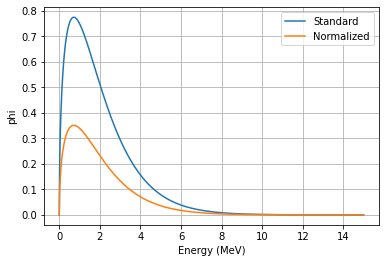

In [164]:
def spectrum (E, a, b, C):
    phi_fun =  C*np.exp(-E/a)*np.sinh(np.sqrt(b*E))
    return phi_fun

phi_ = spectrum(energy, 0.965, 2.23, 1)
phi_norm = spectrum (energy, 0.965, 2.23, 0.453)

plt.plot(energy, phi_, label = 'Standard')    #this only plots one of the four spectra
plt.plot (energy, phi_norm, label = 'Normalized') #this plots the normalized spectrum
plt.ylabel('phi') 
plt.xlabel('Energy (MeV)')
plt.legend() 
plt.grid()
plt.show()

# Second tutoring 10/04/2025

This time we deal with an actual Maxwellian distribution

$p(v) = 4\pi (\frac{m}{2\pi kT})^{\frac{3}{2}}v^2e^{-\frac{mv^2}{2kT}}$

In [4]:
k_B = 1.38e-23
m_n = 1.67e-27
T = 300

def maxwell_boltzmann (v,T):
    '''This function calculates the Maxwell-Boltzmann distribution 
    for a given velocity v(m/s) and temperature T(K).'''
    global coeff
    coeff = (m_n/(2*np.pi*k_B*T))**(3/2)*4*np.pi
    exponent = -m_n*v**2/(2*k_B*T)
    pv = v**2*coeff*np.exp(exponent)
    return pv


# We can also use a lambda function to define the same function
pv = lambda v,T: (m_n/(2*np.pi*k_B*T))**(3/2)*4*np.pi*v**2*np.exp(-m_n*v**2/(2*k_B*T))

''' 
to use the lambda function we can call it using pv(arguments). 
The lambda functions are useful only if we have single line functions 
'''
help (maxwell_boltzmann)   # This command gives all the comments written in the function as we can write useful information inside them.




Help on function maxwell_boltzmann in module __main__:

maxwell_boltzmann(v, T)
    This function calculates the Maxwell-Boltzmann distribution 
    for a given velocity v(m/s) and temperature T(K).



Text(0, 0.5, 'M-B distribution')

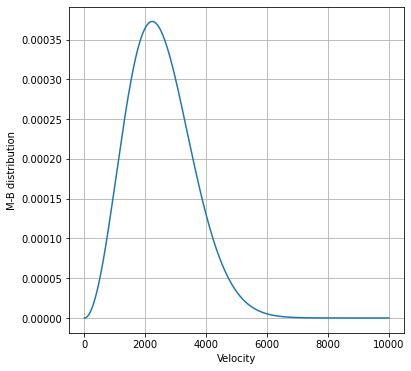

In [11]:
v0=0
vf = 10**4
dv = 0.1

v = np.arange(v0, vf, dv)  #this gives an array of numbers from v0 to vf with a step of dv
f = maxwell_boltzmann(v,T)

plt.figure(figsize=(6,6))  #With this we set the dimensions of the graph
plt.plot(v,f)
plt.grid()
plt.xlabel('Velocity')
plt.ylabel('M-B distribution')

In [ ]:
# We want to see that the function is normalized

int_rectangles = 0

for i in range (len(v)):
    f = maxwell_boltzmann(v[i], T)
    int_rectangles = int_rectangles+f*dv    # this is a manual method to do an integral

error = 1-int_rectangles

print(f'Manual integration: {int_rectangles:.7f}')    # This tells python to print the value contained in the variable as a string, the :.7f truncates the output at the seventh decimal digit (f stands for float)
print('Manual integration: '+str(int_rectangles))    # This does the same thing by converting a number into a string and printing two strings one after the other
print('Manual integration: %f' %int_rectangles)



Manual integration: 1.0000000
Manual integration: 0.999999990964456
Manual integration: 1.000000


In [ ]:
# We can also compute an integral using libraries (numpy, scipy)
# Scipy can do integrals, odes, derivatives, minimum/maximum problems, eigenvalues problems, signal processing, etc

# scipy also contains the bessel functions
help(integrate)

In [ ]:
# We use the trapezoidal rule to integrate
integrate.trapezoid(maxwell_boltzmann(v,T), v) # The ,v is used to specify the variable of integration

np.float64(0.9999999909626737)

In [ ]:
integrate.simpson(maxwell_boltzmann(v,T))  # this uses the simpson rule to integrate

np.float64(9.99999990962674)

In [ ]:
integrate.quad(maxwell_boltzmann, v0, vf, args=(T,))    # This method is an iteration method and also gives the difference between the last and second to last cycle


(0.9999999909662325, 6.775458862853193e-13)

In [32]:
# now we want to compute the max of the distribution

max_distr = np.max(maxwell_boltzmann(v,T))
print(max_distr)

# The corrisponding maximum on the x axis is:
max_idx = np.argmax(maxwell_boltzmann(v,T))   # this gives the index on the array of the x axis that corresponds to the maximum on the y axis
print(max_idx)
print(v[max_idx])  # thus, this is the speed that corresponds to the maximum of the ditribution

0.0003728495644970491
22267
2226.7000000000003


## We can use gamma functions to compute integrals:

$\Gamma (x) = \int_{0}^{\infty}t^{x-1}e^{-t}dt$

In [2]:
from scipy import special    # This has the bessel functions

arg = np.arange(0,5,0.5)

for i in range(len(arg)):
    print(f'Gamma({arg[i]}):{special.gamma(arg[i]+1)}')

Gamma(0.0):1.0
Gamma(0.5):0.8862269254527579
Gamma(1.0):1.0
Gamma(1.5):1.329340388179137
Gamma(2.0):2.0
Gamma(2.5):3.323350970447843
Gamma(3.0):6.0
Gamma(3.5):11.63172839656745
Gamma(4.0):24.0
Gamma(4.5):52.34277778455352


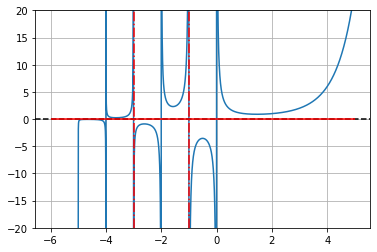

In [ ]:
x=np.arange(-5, 5, 0.0001)
plt.plot(x, special.gamma(x))
plt.ylim([-20, 20])
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')   # This draws a line throughout the entire plot at y=0
plt.hlines(y=0, xmin=-5, xmax=5, color='red')    # This only draws a line at y=0 between specified xmin and xmax

asymptot_ind=np.where(special.gamma(x)>10e4)    # This gives the x axis indexes that satisfy the condition y>10e4
asymptot_val = x[asymptot_ind]

for i in range (len(asymptot_val)):
    plt.axvline(x=asymptot_val[i], color='red', linestyle='-.')

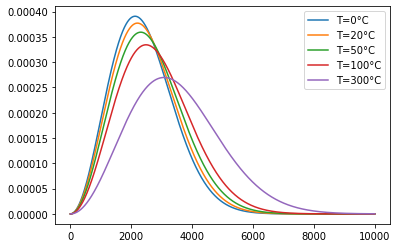

In [52]:
# What happens of we change the temperature?

T = np.array([0, 20, 50, 100, 300])  #celsius
T_K = T+273.15

for i in range (len(T_K)):
    plt.plot(v, maxwell_boltzmann(v,T_K[i]), label=f'T={T[i]}°C')

plt.legend()

In [54]:
# How does the most probable v change with T?

max_idx=np.zeros_like(T)      #This creates an array of zeros with the same dimension of T

for i in range (len(T)):
    f=maxwell_boltzmann(v,T_K[i])
    max_idx[i]= np.argmax(f)
    print(f'Most probable speed at temperature {T[i]}°C: {v[max_idx[i]]}m/s')

Most probable speed at temperature 0°C: 2124.7000000000003m/s
Most probable speed at temperature 20°C: 2201.1m/s
Most probable speed at temperature 50°C: 2311.0m/s
Most probable speed at temperature 100°C: 2483.4m/s
Most probable speed at temperature 300°C: 3077.7000000000003m/s


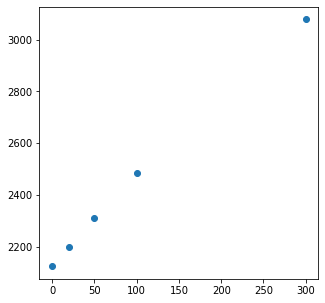

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(T, v[max_idx])

Text(0, 0.5, 'Most probable speed (m/s)')

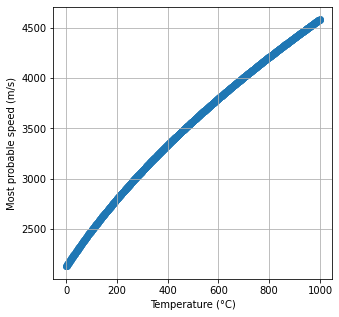

In [ ]:
T = np.arange(0,1000,1)
T_K = T+273.15
max_idx=np.zeros_like(T)      #This creates an array of zeros with the same dimension as T

for i in range (len(T)):
    f=maxwell_boltzmann(v,T_K[i])
    max_idx[i]= np.argmax(f)

plt.figure(figsize=(5,5))
plt.scatter(T, v[max_idx])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('Most probable speed (m/s)')

# Third tutoring 15/04/2025

We will see a bit of Bessel functions

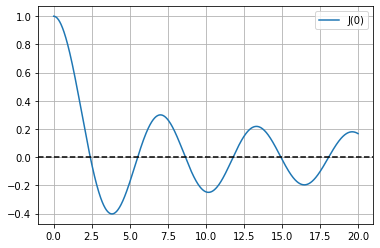

In [6]:
r = np.linspace(0, 20, 1000)
plt.plot(r, sp.jv(0, r), label='J(0)')     # first number is order of function, second is the variable
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

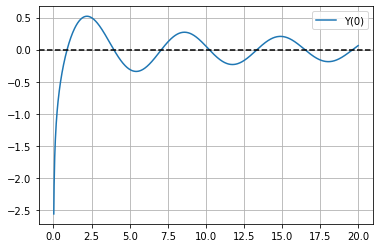

In [7]:
plt.plot(r, sp.yv(0, r), label = 'Y(0)')
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

the Y function of order 0 goes to -infinity for x going to 0, so it cannot be used to describe the flux. 
Thus, for a multiplying medium the flux goes like:\
$\phi (r) = A\cdot J_0(\alpha r)$

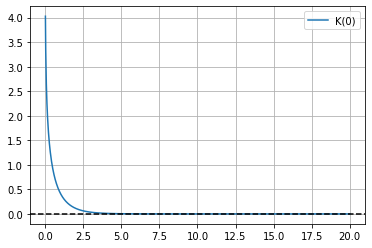

In [8]:
plt.plot(r, sp.kv(0, r), label = 'K(0)')
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

For r going to 0 this goes to infinity so we cannot use it to describe neutron flux

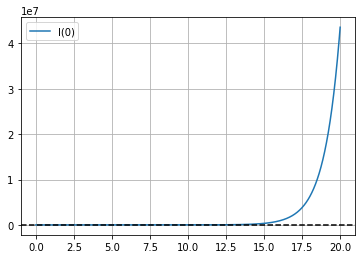

In [9]:
plt.plot(r, sp.iv(0, r), label = 'I(0)')
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [14]:
print(f'J_0(r=0): {sp.jv(0, 0)}')
print(f'Y_0(r=0): {sp.yv(0, 0)}')
print(f'K_0(r=0): {sp.kv(0, 0)}')
print(f'I_0(r=0): {sp.iv(0, 0)}')

type (sp.jv(0,0))

J_0(r=0): 1.0
Y_0(r=0): -inf
K_0(r=0): inf
I_0(r=0): 1.0


numpy.float64

In [23]:
# what is the maximum float numer that python can deal with?
import sys

sys.float_info     # this library gives info on the float type in python

max_float = sys.float_info.max
print(max_float)   # yes big number go up
machine_epsilon = sys.float_info.epsilon # this is the smallest number that can be added to 1 and still be different from 1
print (machine_epsilon)   # yes small number go down
# machine epsilon is used to make sure we don't divide by zero

1.7976931348623157e+308
2.220446049250313e-16


In [19]:
x = np.arange(0,10,100)

for i in range(len(x)):
    y = 1/(x+machine_epsilon)  # this is a way to avoid dividing by zero

print (y[0])

4503599627370496.0


In [27]:
print (f'J0(r=oo): {sp.jv(0, max_float)}')
print(f'Y0(r=oo): {sp.yv(0, max_float)}')
print(f'K0(r=oo): {sp.kv(0, max_float)}')
print(f'I0(r=oo): {sp.iv(0, max_float)}')

J0(r=oo): 4.975570190237047e-155
Y0(r=oo): 3.2644833610576493e-155
K0(r=oo): 0.0
I0(r=oo): nan


nan is a number bigger than max_float

In [25]:
type(sp.iv(0, max_float))  # nan is still a float

numpy.float64

In [26]:
nan_value = sp.iv(0, max_float)

nan_value*1

np.float64(nan)

The machine epsilon is not the minumim float that python can deal with, it is the minimum possible residual we can have after a mathematical operation. We add machine epsilon to avoid dividing by zero because smaller numbers occupy more memory in python than machine epsilon.

## Cross sections

We need to read the cross_section.picke file. the pickle format is optimized for python.

In [49]:
import pickle

In [50]:
with open('cross_sections.pickle', 'rb') as f:   #this oopens the file and makes it readable, naming it f
    cross_sections = pickle.load(f)   #this loads the file and saves it in the variable cross_sections


In [51]:
type(cross_sections)

dict

In [52]:
cross_sections.keys()

dict_keys(['nuc_list', '(N,F)', '(N,G)', '(N,2N)', 'energy'])

In [53]:
cross_sections['nuc_list']  #(N,F) is the cross section for fission, (N,F) for gamma emission etc

['Am234_n',
 'Am235_n',
 'Am236_n',
 'Am237_n',
 'Am238_n',
 'Am239_n',
 'Am240_n',
 'Am241_n',
 'Am242_n',
 'Am243_n',
 'Am244_n',
 'Am245_n',
 'Cm240_n',
 'Cm241_n',
 'Cm242_n',
 'Cm243_n',
 'Cm244_n',
 'Cm245_n',
 'Np232_n',
 'Np233_n',
 'Np234_n',
 'Np235_n',
 'Np236_n',
 'Np237_n',
 'Np238_n',
 'Np239_n',
 'Np240_n',
 'Np241_n',
 'Np242_n',
 'Np243_n',
 'Np244_n',
 'Pu232_n',
 'Pu233_n',
 'Pu234_n',
 'Pu235_n',
 'Pu236_n',
 'Pu237_n',
 'Pu238_n',
 'Pu239_n',
 'Pu240_n',
 'Pu241_n',
 'Pu242_n',
 'Pu243_n',
 'Pu244_n',
 'U232_n',
 'U233_n',
 'U234_n',
 'U235_n',
 'U236_n',
 'U237_n',
 'U238_n',
 'U239_n',
 'U240_n']

In [54]:
cross_sections

{'nuc_list': ['Am234_n',
  'Am235_n',
  'Am236_n',
  'Am237_n',
  'Am238_n',
  'Am239_n',
  'Am240_n',
  'Am241_n',
  'Am242_n',
  'Am243_n',
  'Am244_n',
  'Am245_n',
  'Cm240_n',
  'Cm241_n',
  'Cm242_n',
  'Cm243_n',
  'Cm244_n',
  'Cm245_n',
  'Np232_n',
  'Np233_n',
  'Np234_n',
  'Np235_n',
  'Np236_n',
  'Np237_n',
  'Np238_n',
  'Np239_n',
  'Np240_n',
  'Np241_n',
  'Np242_n',
  'Np243_n',
  'Np244_n',
  'Pu232_n',
  'Pu233_n',
  'Pu234_n',
  'Pu235_n',
  'Pu236_n',
  'Pu237_n',
  'Pu238_n',
  'Pu239_n',
  'Pu240_n',
  'Pu241_n',
  'Pu242_n',
  'Pu243_n',
  'Pu244_n',
  'U232_n',
  'U233_n',
  'U234_n',
  'U235_n',
  'U236_n',
  'U237_n',
  'U238_n',
  'U239_n',
  'U240_n'],
 '(N,F)': [array([1.96018000e+04, 1.83343211e+04, 1.70022045e+04, 1.58598140e+04,
         1.47852553e+04, 1.37661949e+04, 1.28244969e+04, 1.19550335e+04,
         1.11431871e+04, 1.03602463e+04, 9.66581669e+03, 8.99740824e+03,
         8.38792198e+03, 7.81488574e+03, 7.27950535e+03, 6.78115946e+03,
      

In [55]:
nuclides = cross_sections['nuc_list']

In [56]:
nuclides.index('U235_n') #this gives the index of the element 'U235_n' in the list nuclides
U235_idx = nuclides.index('U235_n')

In [57]:
U235_nf = cross_sections['(N,F)'][U235_idx]  # this extracts the value of the (N,F) cross section for the index of U235_n

type(U235_nf)

numpy.ndarray

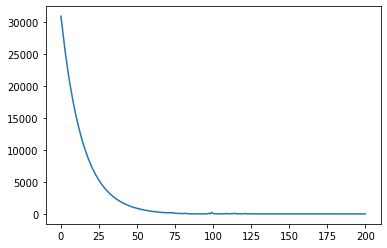

In [58]:
plt.plot(U235_nf)  # the cross sections are given on a log-log scale

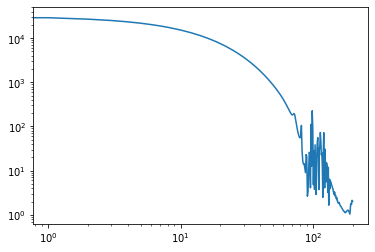

In [59]:
plt.loglog(U235_nf)  # this is the log-log scale, the y axis is in log scale and the x axis is in log scale

We can see the energy vector is not uniform, thus there is not a one to one correspondence between the energy and the cross section

In [60]:
energy = cross_sections['energy']

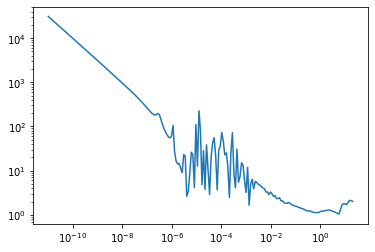

In [61]:
plt.loglog(energy, U235_nf)

This is the actual univocal relation between energy and cross section. We can visit the nndc.bnl.gov site to obtain information on cross sections.

We want to automize the function that takes a nuclide and plots its cross section for all reactions.

In [62]:
def plotting_xs (nuclide):

    if not(isinstance(nuclide, str)):        # this checks wether the nuclide is a string
        print('Nuclide must be a string.')
        print(f'Available nuclides: {nuclides}')
        return


    if (nuclide not in nuclides):
        print(f'Nuclide {nuclide} not found.')
        print(f'Available nuclides: {nuclides}')
        return

    
    nuclide_idx = nuclides.index(nuclide)
    xs_nf = cross_sections['(N,F)'][nuclide_idx]
    xs_ng = cross_sections['(N,G)'][nuclide_idx]
    xs_n2n = cross_sections['(N,2N)'][nuclide_idx]

    plt.loglog(cross_sections['energy'], xs_nf, label = '(N,F)')
    plt.loglog(cross_sections['energy'], xs_ng, label = '(N,G)')
    plt.loglog(cross_sections['energy'], xs_n2n, label = '(N,2N)')

    plt.grid()
    plt.xlabel('Energy (MeV)')
    plt.ylabel(r'$\sigma$ (b)')
    plt.legend()

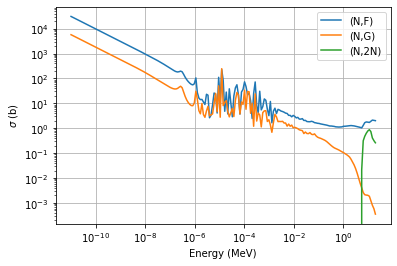

In [63]:
plotting_xs('U235_n')

In [64]:
plotting_xs('U231_n')  # this gives an error because U231 is not on the list

Nuclide U231_n not found.
Available nuclides: ['Am234_n', 'Am235_n', 'Am236_n', 'Am237_n', 'Am238_n', 'Am239_n', 'Am240_n', 'Am241_n', 'Am242_n', 'Am243_n', 'Am244_n', 'Am245_n', 'Cm240_n', 'Cm241_n', 'Cm242_n', 'Cm243_n', 'Cm244_n', 'Cm245_n', 'Np232_n', 'Np233_n', 'Np234_n', 'Np235_n', 'Np236_n', 'Np237_n', 'Np238_n', 'Np239_n', 'Np240_n', 'Np241_n', 'Np242_n', 'Np243_n', 'Np244_n', 'Pu232_n', 'Pu233_n', 'Pu234_n', 'Pu235_n', 'Pu236_n', 'Pu237_n', 'Pu238_n', 'Pu239_n', 'Pu240_n', 'Pu241_n', 'Pu242_n', 'Pu243_n', 'Pu244_n', 'U232_n', 'U233_n', 'U234_n', 'U235_n', 'U236_n', 'U237_n', 'U238_n', 'U239_n', 'U240_n']


In [65]:
plotting_xs(U235_idx)  # this gives an error because U235_idx is not a string but an integer

Nuclide must be a string.
Available nuclides: ['Am234_n', 'Am235_n', 'Am236_n', 'Am237_n', 'Am238_n', 'Am239_n', 'Am240_n', 'Am241_n', 'Am242_n', 'Am243_n', 'Am244_n', 'Am245_n', 'Cm240_n', 'Cm241_n', 'Cm242_n', 'Cm243_n', 'Cm244_n', 'Cm245_n', 'Np232_n', 'Np233_n', 'Np234_n', 'Np235_n', 'Np236_n', 'Np237_n', 'Np238_n', 'Np239_n', 'Np240_n', 'Np241_n', 'Np242_n', 'Np243_n', 'Np244_n', 'Pu232_n', 'Pu233_n', 'Pu234_n', 'Pu235_n', 'Pu236_n', 'Pu237_n', 'Pu238_n', 'Pu239_n', 'Pu240_n', 'Pu241_n', 'Pu242_n', 'Pu243_n', 'Pu244_n', 'U232_n', 'U233_n', 'U234_n', 'U235_n', 'U236_n', 'U237_n', 'U238_n', 'U239_n', 'U240_n']


In [66]:
for i in range(40):
    print(i)
    if i==30:
        break       # break interrupts the cycle and goes to the next one, but does not stop the program
    if i == 20:
        y= i*2
        continue    # continue means: once you arrive here, ignore everything else and start the next iteration
    y = i*4

    print(f'i = {i}, y = {y}')

0
i = 0, y = 0
1
i = 1, y = 4
2
i = 2, y = 8
3
i = 3, y = 12
4
i = 4, y = 16
5
i = 5, y = 20
6
i = 6, y = 24
7
i = 7, y = 28
8
i = 8, y = 32
9
i = 9, y = 36
10
i = 10, y = 40
11
i = 11, y = 44
12
i = 12, y = 48
13
i = 13, y = 52
14
i = 14, y = 56
15
i = 15, y = 60
16
i = 16, y = 64
17
i = 17, y = 68
18
i = 18, y = 72
19
i = 19, y = 76
20
21
i = 21, y = 84
22
i = 22, y = 88
23
i = 23, y = 92
24
i = 24, y = 96
25
i = 25, y = 100
26
i = 26, y = 104
27
i = 27, y = 108
28
i = 28, y = 112
29
i = 29, y = 116
30


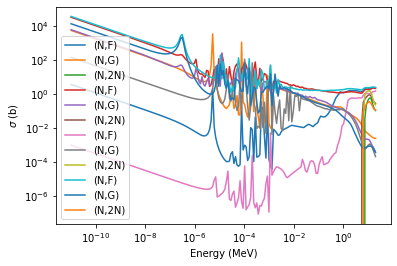

In [67]:
# We might want to plot multiple nuclides at the same time

nuclides_to_plot = ['U234_n', 'U235_n', 'U238_n', 'Pu239_n']
for i in range (len(nuclides_to_plot)):
    plotting_xs(nuclides_to_plot[i])        # python only has 9 colors to plot, so it will repeat the colors for the next nuclides

In [68]:
# this plot is useless, so we refine it
# we want to only plot fission cross sections

def plotting_xs_v2 (nuclide, xs_to_plot):

   if not(isinstance(nuclide, str)):        # this checks wether the nuclide is a string
      print('Nuclide must be a string.')
      print(f'Available nuclides: {nuclides}')
      return


   if (nuclide not in nuclides):
      print(f'Nuclide {nuclide} not found.')
      print(f'Available nuclides: {nuclides}')
      return
    
   if xs_to_plot not in cross_sections.keys():
      print(f'Cross section {xs_to_plot} not found.')
      print(f'Available cross sections: {cross_sections.keys()}')
      return
    
   nuclides_idx = nuclides.index(nuclide)

   

   if not (isinstance(xs_to_plot, list)):
      xs_to_plot = [xs_to_plot]

   for i in range(len(xs_to_plot)):
      xs = cross_sections[xs_to_plot[i]][nuclides_idx]
      plt.loglog(cross_sections['energy'], xs, label = f'{nuclide} {xs_to_plot[i]}')
            
   '''
   nuclide_idx = nuclides.index(nuclide)
    
   xs_nf = cross_sections['(N,F)'][nuclide_idx]
   xs_ng = cross_sections['(N,G)'][nuclide_idx]
   xs_n2n = cross_sections['(N,2N)'][nuclide_idx]

   plt.loglog(cross_sections['energy'], xs_nf, label = '(N,F)')
   plt.loglog(cross_sections['energy'], xs_ng, label = '(N,G)')
   plt.loglog(cross_sections['energy'], xs_n2n, label = '(N,2N)')
   '''
   plt.grid()
   plt.xlabel('Energy (MeV)')
   plt.ylabel(r'$\sigma$ (b)')
   plt.legend()

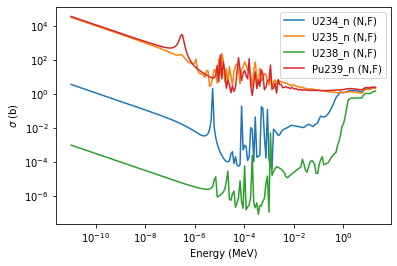

In [69]:
for i in range (len(nuclides_to_plot)):
    plotting_xs_v2(nuclides_to_plot[i], xs_to_plot= '(N,F)')


In [70]:
# we will now use pandas to read data

xs_nf = pd.DataFrame(cross_sections['(N,F)'], index = nuclides) # this creates a sort of excel table with the data

xs_nf

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
Am234_n,19601.800000,18334.321113,17002.204451,15859.814004,14785.255326,13766.194895,12824.496918,11955.033521,11143.187140,10360.246288,...,3.032086,3.182088,3.239256,3.245187,3.246992,3.321805,3.305030,3.284692,3.251582,3.232178
Am235_n,94968.500000,88830.468711,82379.903230,76847.892533,71644.756081,66710.738261,62151.728543,57942.103869,54012.445738,50222.509265,...,3.083600,3.111839,3.191120,3.233522,3.151170,3.092122,3.102290,3.122406,3.108952,3.084260
Am236_n,33944.800000,31749.867147,29443.147523,27464.856979,25603.997486,23839.377606,22208.679132,20702.906534,19297.214850,17941.324625,...,2.940553,2.930172,2.970980,2.993144,2.964761,3.025613,3.024372,2.967404,2.834856,2.753550
Am237_n,388.061000,362.969625,336.600255,313.984395,292.712454,272.539884,253.898840,236.685958,220.616520,205.116413,...,3.131721,3.164272,3.160494,3.146159,3.129667,3.095162,2.996408,2.927486,2.926733,2.922979
Am238_n,22366.700000,20920.417292,19400.528643,18096.923969,16870.845893,15708.048886,14633.558415,13641.439582,12715.172617,11821.714410,...,2.884246,2.922232,2.973233,2.975494,2.947152,2.920058,2.898134,2.872274,2.835585,2.789081
Am239_n,2316.520000,2166.693058,2009.229548,1874.180323,1747.152536,1626.687281,1515.368073,1412.569068,1316.591215,1224.011711,...,2.647060,2.696233,2.803086,2.879710,2.912663,2.886208,2.864268,2.854894,2.842011,2.815060
Am240_n,75141.900000,70283.461678,65177.538837,60798.557556,56679.688023,52773.649360,49164.319814,45831.459380,42719.962756,39718.879210,...,1.880069,2.028304,2.334286,2.505879,2.549639,2.537400,2.533607,2.562547,2.586929,2.602270
Am241_n,212.098000,198.377939,183.959381,171.592074,159.959631,148.926793,138.732099,129.317271,120.527137,112.048511,...,1.704664,1.866368,2.431632,2.416889,2.436865,2.377840,2.474859,2.609399,2.482758,2.329200
Am242_n,96925.100000,90658.105676,84071.843360,78423.204642,73110.107014,68071.666331,63415.817241,59116.577286,55102.989605,51231.664344,...,1.665370,1.901796,2.127380,2.188472,2.145701,2.124012,2.325911,2.518714,2.598748,2.656150
Am243_n,4.059710,3.797194,3.521311,3.284699,3.062147,2.851090,2.656068,2.475975,2.307846,2.145673,...,1.432468,1.872454,2.245631,2.244720,2.133591,2.058774,2.035265,2.252864,2.494908,2.590719


In [71]:
xs_nf = xs_nf.T

xs_nf

,Am234_n,Am235_n,Am236_n,Am237_n,Am238_n,Am239_n,Am240_n,Am241_n,Am242_n,Am243_n,...,Pu244_n,U232_n,U233_n,U234_n,U235_n,U236_n,U237_n,U238_n,U239_n,U240_n
0,19601.800000,94968.500000,33944.800000,388.061000,22366.700000,2316.520000,75141.900000,212.098000,96925.100000,4.059710,...,0.086827,4076.020000,27003.100000,3.447610,30922.800000,2.351250,89.300100,0.000929,695.198000,0.054237
1,18334.321113,88830.468711,31749.867147,362.969625,20920.417292,2166.693058,70283.461678,198.377939,90658.105676,3.797194,...,0.081213,3812.438386,25256.941894,3.224676,28923.076893,2.199215,83.525491,0.000869,650.245764,0.050729
2,17002.204451,82379.903230,29443.147523,336.600255,19400.528643,2009.229548,65177.538837,183.959381,84071.843360,3.521311,...,0.075312,3535.430208,23421.883130,2.990378,26821.455564,2.039432,77.456670,0.000806,603.003057,0.047044
3,15859.814004,76847.892533,27464.856979,313.984395,18096.923969,1874.180323,60798.557556,171.592074,78423.204642,3.284699,...,0.070251,3297.853768,21848.039035,2.789442,25019.102767,1.902394,72.251814,0.000752,562.486446,0.043883
4,14785.255326,71644.756081,25603.997486,292.712454,16870.845893,1747.152536,56679.688023,159.959631,73110.107014,3.062147,...,0.065491,3074.388088,20367.765626,2.600436,23323.685562,1.773495,67.356066,0.000701,524.376005,0.040909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3.321805,3.092122,3.025613,3.095162,2.920058,2.886208,2.537400,2.377840,2.124012,2.058774,...,1.568355,2.671622,2.150765,2.004580,1.710140,1.510420,1.152727,1.006081,0.670871,0.598736
197,3.305030,3.102290,3.024372,2.996408,2.898134,2.864268,2.533607,2.474859,2.325911,2.035265,...,1.677103,2.601928,2.191215,1.919040,1.905658,1.520225,1.493517,1.037830,0.835254,0.630528
198,3.284692,3.122406,2.967404,2.927486,2.872274,2.854894,2.562547,2.609399,2.518714,2.252864,...,1.833300,2.586504,2.407527,2.296830,2.129241,1.761785,1.641402,1.248901,0.874939,0.833291
199,3.251582,3.108952,2.834856,2.926733,2.835585,2.842011,2.586929,2.482758,2.598748,2.494908,...,1.807653,2.645130,2.353158,2.270765,2.082582,1.807503,1.624195,1.319978,0.907539,0.987678


In [72]:
xs_nf.index = cross_sections['energy']  # this sets the index of the table to be the energy values

xs_nf

,Am234_n,Am235_n,Am236_n,Am237_n,Am238_n,Am239_n,Am240_n,Am241_n,Am242_n,Am243_n,...,Pu244_n,U232_n,U233_n,U234_n,U235_n,U236_n,U237_n,U238_n,U239_n,U240_n
1.000000e-11,19601.800000,94968.500000,33944.800000,388.061000,22366.700000,2316.520000,75141.900000,212.098000,96925.100000,4.059710,...,0.086827,4076.020000,27003.100000,3.447610,30922.800000,2.351250,89.300100,0.000929,695.198000,0.054237
1.150000e-11,18334.321113,88830.468711,31749.867147,362.969625,20920.417292,2166.693058,70283.461678,198.377939,90658.105676,3.797194,...,0.081213,3812.438386,25256.941894,3.224676,28923.076893,2.199215,83.525491,0.000869,650.245764,0.050729
1.330000e-11,17002.204451,82379.903230,29443.147523,336.600255,19400.528643,2009.229548,65177.538837,183.959381,84071.843360,3.521311,...,0.075312,3535.430208,23421.883130,2.990378,26821.455564,2.039432,77.456670,0.000806,603.003057,0.047044
1.530000e-11,15859.814004,76847.892533,27464.856979,313.984395,18096.923969,1874.180323,60798.557556,171.592074,78423.204642,3.284699,...,0.070251,3297.853768,21848.039035,2.789442,25019.102767,1.902394,72.251814,0.000752,562.486446,0.043883
1.760000e-11,14785.255326,71644.756081,25603.997486,292.712454,16870.845893,1747.152536,56679.688023,159.959631,73110.107014,3.062147,...,0.065491,3074.388088,20367.765626,2.600436,23323.685562,1.773495,67.356066,0.000701,524.376005,0.040909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.140000e+01,3.321805,3.092122,3.025613,3.095162,2.920058,2.886208,2.537400,2.377840,2.124012,2.058774,...,1.568355,2.671622,2.150765,2.004580,1.710140,1.510420,1.152727,1.006081,0.670871,0.598736
1.310000e+01,3.305030,3.102290,3.024372,2.996408,2.898134,2.864268,2.533607,2.474859,2.325911,2.035265,...,1.677103,2.601928,2.191215,1.919040,1.905658,1.520225,1.493517,1.037830,0.835254,0.630528
1.510000e+01,3.284692,3.122406,2.967404,2.927486,2.872274,2.854894,2.562547,2.609399,2.518714,2.252864,...,1.833300,2.586504,2.407527,2.296830,2.129241,1.761785,1.641402,1.248901,0.874939,0.833291
1.740000e+01,3.251582,3.108952,2.834856,2.926733,2.835585,2.842011,2.586929,2.482758,2.598748,2.494908,...,1.807653,2.645130,2.353158,2.270765,2.082582,1.807503,1.624195,1.319978,0.907539,0.987678


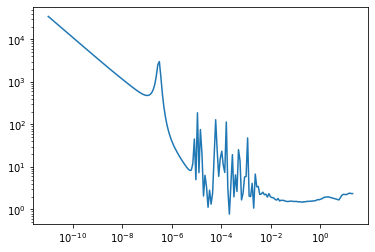

In [73]:
plt.loglog(xs_nf.index, xs_nf['Pu239_n'])

In [74]:
xs_nf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1e-11 to 20.0
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Am234_n  201 non-null    float64
 1   Am235_n  201 non-null    float64
 2   Am236_n  201 non-null    float64
 3   Am237_n  201 non-null    float64
 4   Am238_n  201 non-null    float64
 5   Am239_n  201 non-null    float64
 6   Am240_n  201 non-null    float64
 7   Am241_n  201 non-null    float64
 8   Am242_n  201 non-null    float64
 9   Am243_n  201 non-null    float64
 10  Am244_n  201 non-null    float64
 11  Am245_n  201 non-null    float64
 12  Cm240_n  201 non-null    float64
 13  Cm241_n  201 non-null    float64
 14  Cm242_n  201 non-null    float64
 15  Cm243_n  201 non-null    float64
 16  Cm244_n  201 non-null    float64
 17  Cm245_n  201 non-null    float64
 18  Np232_n  201 non-null    float64
 19  Np233_n  201 non-null    float64
 20  Np234_n  201 non-null    float64
 21  Np235_n  201 non

In [75]:
xs_nf.columns

Index(['Am234_n', 'Am235_n', 'Am236_n', 'Am237_n', 'Am238_n', 'Am239_n',
       'Am240_n', 'Am241_n', 'Am242_n', 'Am243_n', 'Am244_n', 'Am245_n',
       'Cm240_n', 'Cm241_n', 'Cm242_n', 'Cm243_n', 'Cm244_n', 'Cm245_n',
       'Np232_n', 'Np233_n', 'Np234_n', 'Np235_n', 'Np236_n', 'Np237_n',
       'Np238_n', 'Np239_n', 'Np240_n', 'Np241_n', 'Np242_n', 'Np243_n',
       'Np244_n', 'Pu232_n', 'Pu233_n', 'Pu234_n', 'Pu235_n', 'Pu236_n',
       'Pu237_n', 'Pu238_n', 'Pu239_n', 'Pu240_n', 'Pu241_n', 'Pu242_n',
       'Pu243_n', 'Pu244_n', 'U232_n', 'U233_n', 'U234_n', 'U235_n', 'U236_n',
       'U237_n', 'U238_n', 'U239_n', 'U240_n'],
      dtype='object')

In [76]:
# we can count the number of null values we have

xs_nf.isnull().sum()

Am234_n    0
Am235_n    0
Am236_n    0
Am237_n    0
Am238_n    0
Am239_n    0
Am240_n    0
Am241_n    0
Am242_n    0
Am243_n    0
Am244_n    0
Am245_n    0
Cm240_n    0
Cm241_n    0
Cm242_n    0
Cm243_n    0
Cm244_n    0
Cm245_n    0
Np232_n    0
Np233_n    0
Np234_n    0
Np235_n    0
Np236_n    0
Np237_n    0
Np238_n    0
Np239_n    0
Np240_n    0
Np241_n    0
Np242_n    0
Np243_n    0
Np244_n    0
Pu232_n    0
Pu233_n    0
Pu234_n    0
Pu235_n    0
Pu236_n    0
Pu237_n    0
Pu238_n    0
Pu239_n    0
Pu240_n    0
Pu241_n    0
Pu242_n    0
Pu243_n    0
Pu244_n    0
U232_n     0
U233_n     0
U234_n     0
U235_n     0
U236_n     0
U237_n     0
U238_n     0
U239_n     0
U240_n     0
dtype: int64

In [77]:
xs_nf.mean()

Am234_n    1437.581613
Am235_n    7043.499181
Am236_n    2491.772531
Am237_n      43.590045
Am238_n    1718.233826
Am239_n     170.238556
Am240_n    5493.580036
Am241_n      16.116514
Am242_n    7126.336035
Am243_n       0.561477
Am244_n    8460.665071
Am245_n      27.324941
Cm240_n     115.726038
Cm241_n    3664.908373
Cm242_n      17.870833
Cm243_n    2191.904817
Cm244_n       4.148161
Cm245_n    8968.897291
Np232_n    1393.442879
Np233_n     158.992871
Np234_n    7310.784478
Np235_n     209.682920
Np236_n    9967.415753
Np237_n       0.319533
Np238_n    7900.574205
Np239_n       0.224462
Np240_n     344.070724
Np241_n       7.080245
Np242_n     941.257452
Np243_n       7.063013
Np244_n     938.594211
Pu232_n      95.424428
Pu233_n    2659.439006
Pu234_n       8.471107
Pu235_n    5603.274513
Pu236_n     541.477015
Pu237_n    8613.845630
Pu238_n      80.669481
Pu239_n    2574.799375
Pu240_n       0.476420
Pu241_n    3870.167179
Pu242_n       0.250883
Pu243_n     784.605177
Pu244_n    

In [78]:
xs_nf.std() # standard deviation

Am234_n     3535.534025
Am235_n    17135.741280
Am236_n     6122.360119
Am237_n      105.731602
Am238_n     4037.738978
Am239_n      417.975303
Am240_n    13561.762019
Am241_n       38.217538
Am242_n    17481.178757
Am243_n        0.860016
Am244_n    20918.921433
Am245_n       69.015185
Cm240_n      269.312791
Cm241_n     9040.035540
Cm242_n       42.641249
Cm243_n     5304.810957
Cm244_n        9.224141
Cm245_n    22489.107567
Np232_n     3427.663864
Np233_n      315.019682
Np234_n    18087.943468
Np235_n      477.242340
Np236_n    24657.727158
Np237_n        0.586920
Np238_n    19543.581122
Np239_n        0.423818
Np240_n     1056.509864
Np241_n       16.924943
Np242_n     2326.604797
Np243_n       16.192446
Np244_n     2299.297224
Pu232_n      896.967193
Pu233_n     6508.326543
Pu234_n       25.194261
Pu235_n    14060.599914
Pu236_n     1278.853365
Pu237_n    21385.516224
Pu238_n      201.607730
Pu239_n     6236.115952
Pu240_n        0.770176
Pu241_n     9536.213626
Pu242_n        0

In [79]:
# we can find if the data is correlated in any way
xs_nf.corr()  # this gives a correlation matrix, where the values are between -1 and 1. The closer to 1, the more correlated the two columns are

,Am234_n,Am235_n,Am236_n,Am237_n,Am238_n,Am239_n,Am240_n,Am241_n,Am242_n,Am243_n,...,Pu244_n,U232_n,U233_n,U234_n,U235_n,U236_n,U237_n,U238_n,U239_n,U240_n
Am234_n,1.000000,0.999700,0.999965,0.606965,0.991872,0.998363,0.999971,0.993889,0.999911,0.727435,...,-0.120246,0.993958,0.999899,0.694106,0.999980,0.038884,0.974440,-0.122716,0.362569,-0.066563
Am235_n,0.999700,1.000000,0.999716,0.603796,0.991313,0.997939,0.999711,0.993272,0.999694,0.724783,...,-0.122191,0.993443,0.999596,0.692297,0.999698,0.036954,0.973333,-0.124276,0.360888,-0.068168
Am236_n,0.999965,0.999716,1.000000,0.608366,0.992391,0.998399,0.999995,0.994137,0.999967,0.727054,...,-0.120539,0.993889,0.999911,0.693980,0.999968,0.037763,0.974120,-0.122952,0.363059,-0.066832
Am237_n,0.606965,0.603796,0.608366,1.000000,0.614207,0.606780,0.608030,0.619801,0.609017,0.439776,...,-0.124873,0.602350,0.607991,0.382124,0.606795,0.031876,0.597165,-0.116333,0.360982,-0.081273
Am238_n,0.991872,0.991313,0.992391,0.614207,1.000000,0.989773,0.992244,0.989940,0.992664,0.714684,...,-0.127797,0.985648,0.991896,0.681849,0.991945,0.035329,0.964832,-0.128529,0.356902,-0.072804
Am239_n,0.998363,0.997939,0.998399,0.606780,0.989773,1.000000,0.998401,0.992380,0.998347,0.729069,...,-0.118679,0.992176,0.998584,0.698534,0.998353,0.038025,0.976109,-0.121282,0.361832,-0.065275
Am240_n,0.999971,0.999711,0.999995,0.608030,0.992244,0.998401,1.000000,0.994133,0.999952,0.727423,...,-0.119941,0.993858,0.999921,0.694331,0.999980,0.037686,0.974108,-0.122466,0.363012,-0.066351
Am241_n,0.993889,0.993272,0.994137,0.619801,0.989940,0.992380,0.994133,1.000000,0.994089,0.737263,...,-0.107371,0.987725,0.994056,0.698257,0.993957,0.036687,0.967619,-0.110143,0.439588,-0.054800
Am242_n,0.999911,0.999694,0.999967,0.609017,0.992664,0.998347,0.999952,0.994089,1.000000,0.726175,...,-0.120941,0.993734,0.999856,0.693392,0.999920,0.037170,0.973786,-0.123264,0.361553,-0.067144
Am243_n,0.727435,0.724783,0.727054,0.439776,0.714684,0.729069,0.727423,0.737263,0.726175,1.000000,...,0.509005,0.719756,0.728402,0.921755,0.727849,0.042475,0.726756,0.495880,0.327710,0.527315


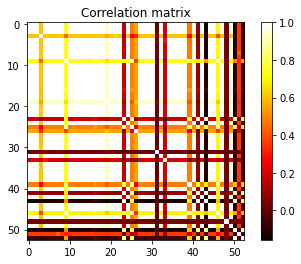

In [80]:
# we can also find which are the correlated variables

correlation_matrix = xs_nf.corr()

plt.imshow(correlation_matrix, cmap = 'hot', interpolation = 'nearest')
plt.colorbar()  # this adds a color bar to the plot
# plt.xticks(range(len(xs_nf.columns)), xs_nf.columns, rotation=90)  # this sets the x axis ticks to be the columns of the table
# plt.yticks(range(len(xs_nf.columns)), xs_nf.columns)  # this sets the y axis ticks to be the columns of the table
plt.title('Correlation matrix')
plt.show()

In [81]:
#we want to extract fission cross sections for energies bigger or equal to 1 MeV
fast_xs = xs_nf[xs_nf.index >= 1]  # this extracts the values of the table for energies bigger or equal to 1 MeV
fast_xs


,Am234_n,Am235_n,Am236_n,Am237_n,Am238_n,Am239_n,Am240_n,Am241_n,Am242_n,Am243_n,...,Pu244_n,U232_n,U233_n,U234_n,U235_n,U236_n,U237_n,U238_n,U239_n,U240_n
1.02,3.481592,2.729563,3.373860,3.327244,1.846014,0.891915,1.956591,1.317980,1.948216,1.023766,...,1.376791,1.987301,1.861272,1.105937,1.201636,0.361175,0.692249,0.016363,0.379409,0.008357
1.18,3.459050,2.686138,3.329481,3.259258,2.055612,1.090630,1.900032,1.615609,1.960427,1.299306,...,1.431199,1.997709,1.873051,1.187630,1.203359,0.580877,0.710045,0.043475,0.389144,0.028553
1.36,3.385214,2.651528,3.280604,3.170180,2.300425,1.311769,1.874213,1.768943,1.968985,1.377834,...,1.416561,2.150962,1.899235,1.300306,1.224416,0.723476,0.717875,0.132642,0.388008,0.094712
1.56,3.256803,2.636306,3.227240,3.066470,2.544916,1.541756,1.880041,1.857100,1.967702,1.421992,...,1.389359,2.310600,1.932036,1.400259,1.248546,0.662811,0.719937,0.394048,0.382877,0.183260
1.80,3.077367,2.663779,3.170618,2.949182,2.751940,1.786710,1.904029,1.841304,1.976130,1.468442,...,1.351649,2.421000,1.966200,1.526110,1.271729,0.771835,0.713065,0.488907,0.377923,0.253365
2.07,2.879446,2.758416,3.114983,2.849662,2.859396,1.998219,1.932259,1.856417,1.983521,1.506820,...,1.317327,2.391318,1.988712,1.510740,1.285020,0.842365,0.690089,0.541959,0.378447,0.313790
2.39,2.701280,2.917965,3.068121,2.783186,2.904567,2.187285,1.948838,1.892702,1.961587,1.522175,...,1.291799,2.356140,1.967464,1.483907,1.267855,0.881758,0.653995,0.547005,0.383498,0.334099
2.75,2.584413,3.090216,3.040237,2.760998,2.902297,2.256440,1.943994,1.883632,1.916106,1.512056,...,1.265375,2.320245,1.909259,1.484879,1.243669,0.855381,0.620523,0.540280,0.381460,0.345320
3.17,2.526182,3.193470,3.021879,2.796262,2.880883,2.136075,1.932180,1.848942,1.857646,1.492446,...,1.227130,2.291564,1.817844,1.507029,1.202316,0.877904,0.593362,0.532721,0.361769,0.352642
3.66,2.525522,3.204681,3.005413,2.874753,2.892764,2.473135,1.915974,1.836915,1.787240,1.464206,...,1.168076,2.275882,1.719303,1.447021,1.161353,0.892963,0.576842,0.550726,0.328673,0.352035


In [82]:
# e want to see if there are nuclides with cross section bigger than 3 barns

filter = fast_xs[fast_xs > 3]
filter

,Am234_n,Am235_n,Am236_n,Am237_n,Am238_n,Am239_n,Am240_n,Am241_n,Am242_n,Am243_n,...,Pu244_n,U232_n,U233_n,U234_n,U235_n,U236_n,U237_n,U238_n,U239_n,U240_n
1.02,3.481592,NaN,3.373860,3.327244,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.18,3.459050,NaN,3.329481,3.259258,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.36,3.385214,NaN,3.280604,3.170180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.56,3.256803,NaN,3.227240,3.066470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.80,3.077367,NaN,3.170618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.07,NaN,NaN,3.114983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.39,NaN,NaN,3.068121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.75,NaN,3.090216,3.040237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.17,NaN,3.193470,3.021879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.66,NaN,3.204681,3.005413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# we don't want to see the nans

filter.dropna(axis = 1, how = 'all')  # this drops all the columns that have only nans in them

,Am234_n,Am235_n,Am236_n,Am237_n,Np233_n,Pu233_n,Pu235_n
1.02,3.481592,NaN,3.373860,3.327244,3.869226,3.105887,3.112622
1.18,3.459050,NaN,3.329481,3.259258,3.732403,NaN,3.035613
1.36,3.385214,NaN,3.280604,3.170180,3.481700,NaN,NaN
1.56,3.256803,NaN,3.227240,3.066470,3.189700,NaN,NaN
1.80,3.077367,NaN,3.170618,NaN,NaN,NaN,NaN
2.07,NaN,NaN,3.114983,NaN,NaN,NaN,NaN
2.39,NaN,NaN,3.068121,NaN,NaN,NaN,NaN
2.75,NaN,3.090216,3.040237,NaN,NaN,NaN,NaN
3.17,NaN,3.193470,3.021879,NaN,NaN,NaN,3.017017
3.66,NaN,3.204681,3.005413,NaN,NaN,NaN,NaN


<Axes: >

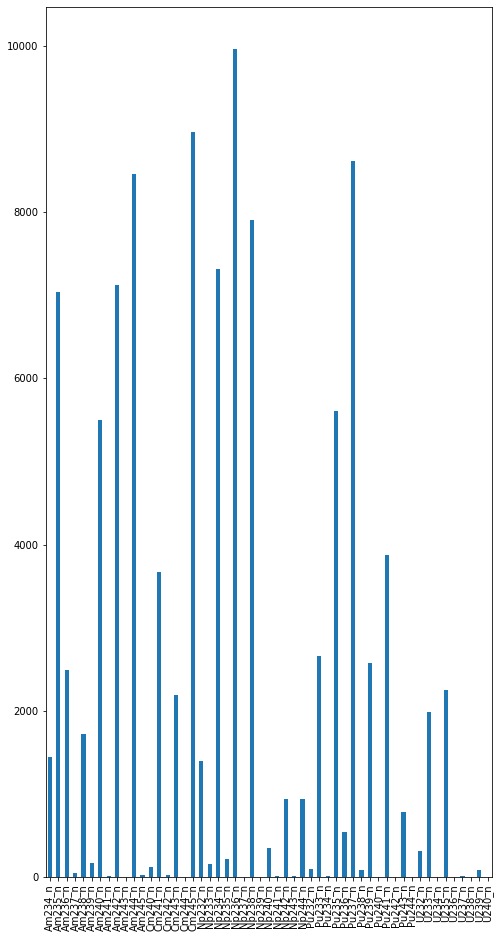

In [84]:
# pandas has a dedicated plotting library

xs_nf.mean().plot(kind = 'bar', figsize = (8, 16))

In [85]:
def watt_spectrum (E):
    phi = np.exp(-E/0.965)*np.sinh(np.sqrt(2.29*E))
    return phi

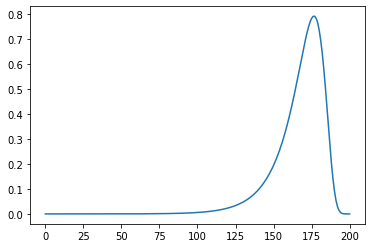

In [86]:
phi_U235 = watt_spectrum(xs_nf.index)
plt.plot(phi_U235)

In [87]:
weight = phi_U235 / np.sum(phi_U235)  # this normalizes the distribution

u235_nf = np.sum(xs_nf['U235_n']*weight)

energy_th = xs_nf.index[xs_nf.index < 1e-6]
energy_th = np.array(energy_th)

thermal_xs = xs_nf[xs_nf.index < 1e-6]

thermal_spectrum = watt_spectrum(energy_th)

weights = thermal_spectrum / np.sum(thermal_spectrum)

U235_nf_thermal = np.sum(thermal_xs['U235_n']*weights)
U235_nf_thermal

np.float64(525.288435502424)

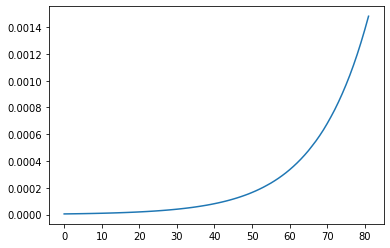

In [88]:
plt.plot(thermal_spectrum)